# NV and Carbon 13 simulation examples

This notebook showcases some of the functionality of the NV and Carbon 13 code in the module [electron_nuclear_sim](electron_nuclear_sim.py).

This code can handle simulations of the nitrogen vacancy centre electronic state, along with Carbon 13 nuclear spins, and if desired, the nitrogen nuclear spin of the NV. 

It is also built to simulate a range of imperfections, including finite microwave pulses, amplitude errors, and detuning of the MW field from the NV frequency.

In [53]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import electron_nuclear_sim as nsc; reload(nsc)

<module 'electron_nuclear_sim' from 'electron_nuclear_sim.pyc'>

## Microwave Pi pulse fidelities

First we simply simulate applying a MW pi pulse and measuring the resulting state infidelity as we sweep the pulse amplitude.

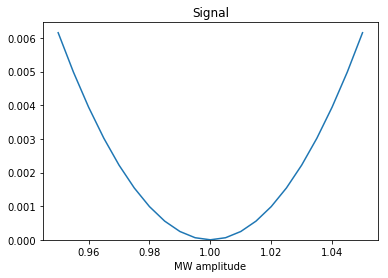

Min sig.  0.0  at  1.0


In [50]:
reload(nsc)
NVsys = nsc.noisy_NV_system(mw_duration=180e-9,carbon_params = [],inc_nitrogen=False,pulse_shape='Hermite')
fids = nsc.sweep_MW_amp(NVsys,N=1,amp_range=np.arange(0.95,1.05,0.005))

We can sweep the pulse duration as well:

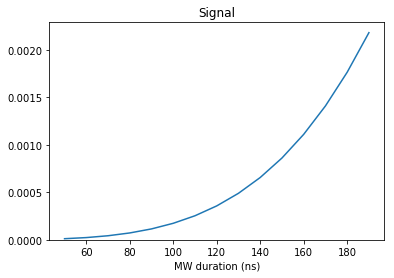

In [51]:
reload(nsc)
NVsys = nsc.noisy_NV_system(mw_duration=100e-9,carbon_params = [],inc_nitrogen=True,pulse_shape='Hermite')
fids = nsc.sweep_MW_duration(NVsys,N=1)

### Monte Carlo

Here we Monte Carlo the pulse amplitude

Infidelity is 0.024230 \pm 0.001837


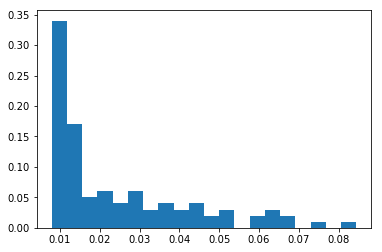

In [17]:
reload(nsc)
NVsys = nsc.noisy_NV_system(mw_duration=100e-9,carbon_params = [],inc_nitrogen=True,pulse_shape='Hermite')
infids = nsc.MonteCarlo_MWFid(NVsys,sigma=0.01,mean=1.0,N_rand=100)

plt.figure()
weights = np.ones_like(infids)/len(infids)
plt.hist(infids,bins = 20, weights = weights)
plt.show()
plt.close()

## Dark ESR

A classic spectroscopic measurement of the NV centre:

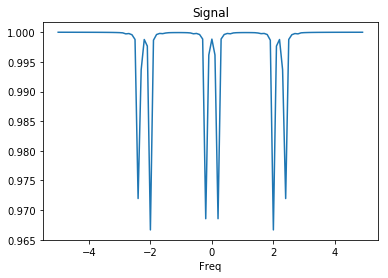

In [18]:
reload(nsc)
NVsys = nsc.noisy_NV_system(mw_duration=10000e-9,use_hf_library = True,inc_nitrogen=True,pulse_shape='square',scheme="simple")
dd = nsc.dark_esr(NVsys)

As the MW pulse duration decreases, we see the dips broaden

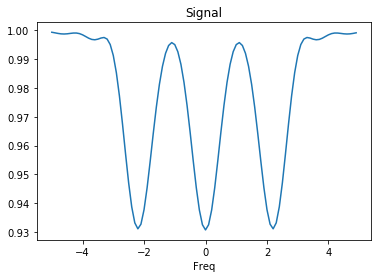

In [19]:
reload(nsc)
NVsys = nsc.noisy_NV_system(mw_duration=1000e-9,use_hf_library = True,inc_nitrogen=True,pulse_shape='square',scheme="simple")
dd = nsc.dark_esr(NVsys)

## E ramsey / Hahn echo

Experiment in which we prepare the NV in a superposition state, let it evolve, rotate back and measure. For the Hahn echo, half way through we apply a pi pulse

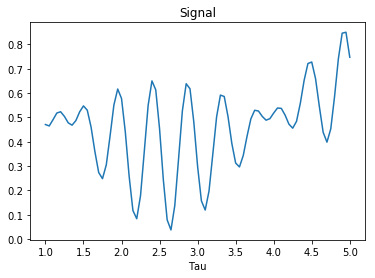

In [55]:
reload(nsc)
NVsys = nsc.noisy_NV_system(mw_duration = 200e-9,use_hf_library = True,inc_nitrogen=True,pulse_shape='Hermite')

dd = nsc.e_ramsey(NVsys)

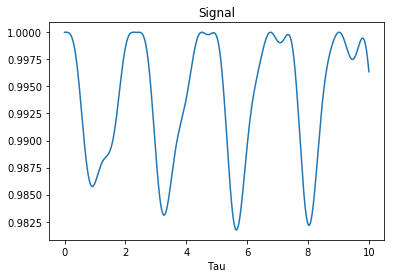

Min sig.  0.981742043543  at  5.65


In [56]:
reload(nsc)
NVsys = nsc.NV_system(use_hf_library = True,inc_nitrogen=True,pulse_shape='Hermite')

dd = nsc.hahn_echo(NVsys)

## Dynamical decoupling

The code can handle dynamical decoupling at various levels of complexity:

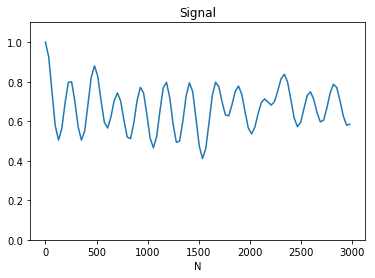

In [57]:
reload(nsc)
NVsys = nsc.noisy_NV_system(mw_duration=100e-9,mw_amp=1.0,use_hf_library = True,inc_nitrogen=True,pulse_shape='Hermite')
# NVsys = nsc.NV_system(carbon_params = [],inc_nitrogen=True,scheme="XY8")

dd = nsc.dynamical_decouple(NVsys,scheme="simple")


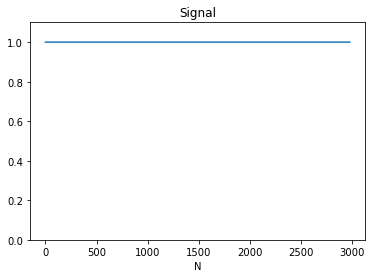

In [58]:
reload(nsc)
NVsys = nsc.noisy_NV_system(mw_duration=100e-9,mw_amp=1.0,use_hf_library = True,inc_nitrogen=True,pulse_shape='Hermite')
# NVsys = nsc.NV_system(carbon_params = [],inc_nitrogen=True,scheme="XY8")

dd = nsc.dynamical_decouple(NVsys,scheme="XY8")


## C13 Fingerprint

With coupled carbons, sweep the timing between pulses reveals resonances in which the carbon and NV states become entangled. This leads to a dip in the contrast of an NV state measurement.

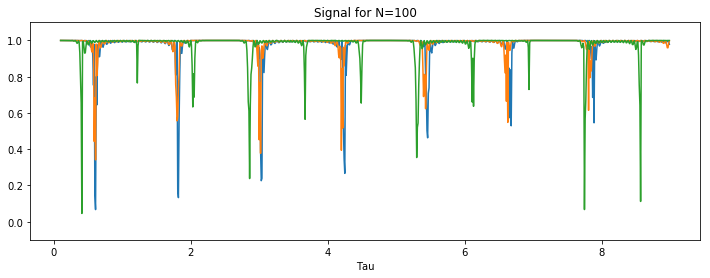

In [27]:
reload(nsc)
import time 

NVsys = nsc.NV_system(use_hf_library = True,B_field = 400.0)
nsc.C13_fingerprint(NVsys,N=100,tau_range =  np.arange(0.1e-6,9e-6,1e-8),calc_indiv=True,quick_calc = False)


## Prepare X, and measure XY

We can use these resonances to apply a range of gates to our carbons indirectly. Here we sweep the timing of the pulse and therefore the resonance condition

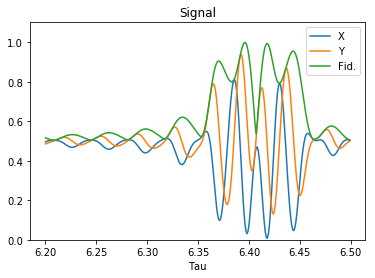

Max fid.  0.998602515694  at  6.396


In [29]:
NVsys = nsc.NV_system(use_hf_library = True)
nsc.prepare_X_and_measure_XY(NVsys,tau_range =  np.arange(6.2e-6,6.5e-6,1e-9),meas='eXY')

### Finite pulse durations

Here we do the same thing, but with finite pulse durations

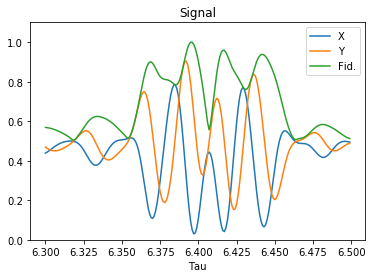

Max fid.  1.00002972277  at  6.395


In [30]:
reload(nsc)
NVsys = nsc.noisy_NV_system(mw_duration=100e-9,mean_amp=0.99,use_hf_library = True,inc_nitrogen=True,pulse_shape='Hermite')

# nsc.C13_fingerprint(NVsys,N=32,tau_range =  np.arange(6.1e-6,6.7e-6,2e-9),quick_calc = False)
nsc.prepare_X_and_measure_XY(NVsys,tau_range =  np.arange(6.3e-6,6.5e-6,1e-9),meas='eXY')

### Prepare and measure monte carlo fidelities

Fidelity is 0.940929 \pm 0.017125


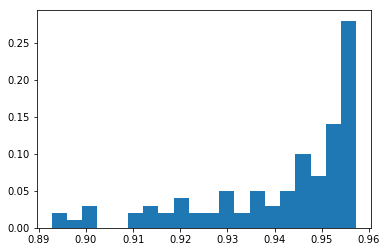

In [31]:
reload(nsc)
NVsys = nsc.noisy_NV_system(mw_duration=100e-9,use_hf_library = True,inc_nitrogen=True,pulse_shape='Hermite')
infids = nsc.MonteCarlo_MWAmp_CGate_fid(NVsys,tau=6.442e-6,sigma=0.01,mean=1.0, meas = 'eXY')

plt.figure()
weights = np.ones_like(infids)/len(infids)
plt.hist(infids,bins = 20, weights = weights)
plt.show()
plt.close()